### Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('INGV/train.csv')
train.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


### Let's display the data

In [3]:
from pylab import rcParams
rcParams ['figure.figsize'] = 12,5

<Axes: >

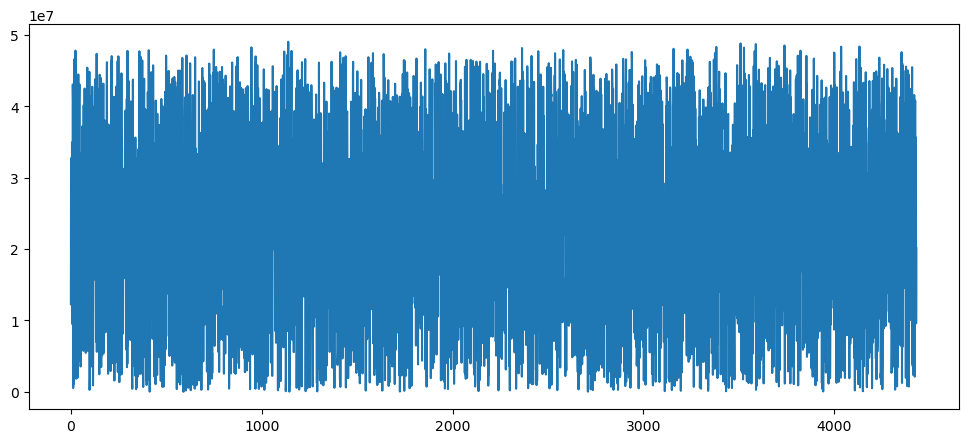

In [4]:
train['time_to_eruption'].plot()

In [5]:
train.shape

(4431, 2)

In [6]:
submission = pd.read_csv('INGV/sample_submission.csv')
submission.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [7]:
test = submission['segment_id']

In [8]:
test = pd.DataFrame(test)

In [9]:
test.head()

,segment_id
0,1000213997
1,100023368
2,1000488999
3,1001028887
4,1001857862


In [10]:
sensor_train = pd.read_csv('INGV/sensor train.csv')
sensor_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,224.0,32.0,-858.0,-390.0,109.0,38.0,507.0,630.0,100.0,-253.0
1,134.0,39.0,-682.0,-403.0,126.0,-136.0,589.0,267.0,134.0,-179.0
2,69.0,111.0,-520.0,-386.0,94.0,-20.0,649.0,-234.0,173.0,-93.0
3,47.0,185.0,-196.0,-341.0,44.0,-235.0,755.0,-434.0,184.0,-30.0
4,194.0,247.0,-84.0,-266.0,20.0,-76.0,876.0,-674.0,186.0,0.0


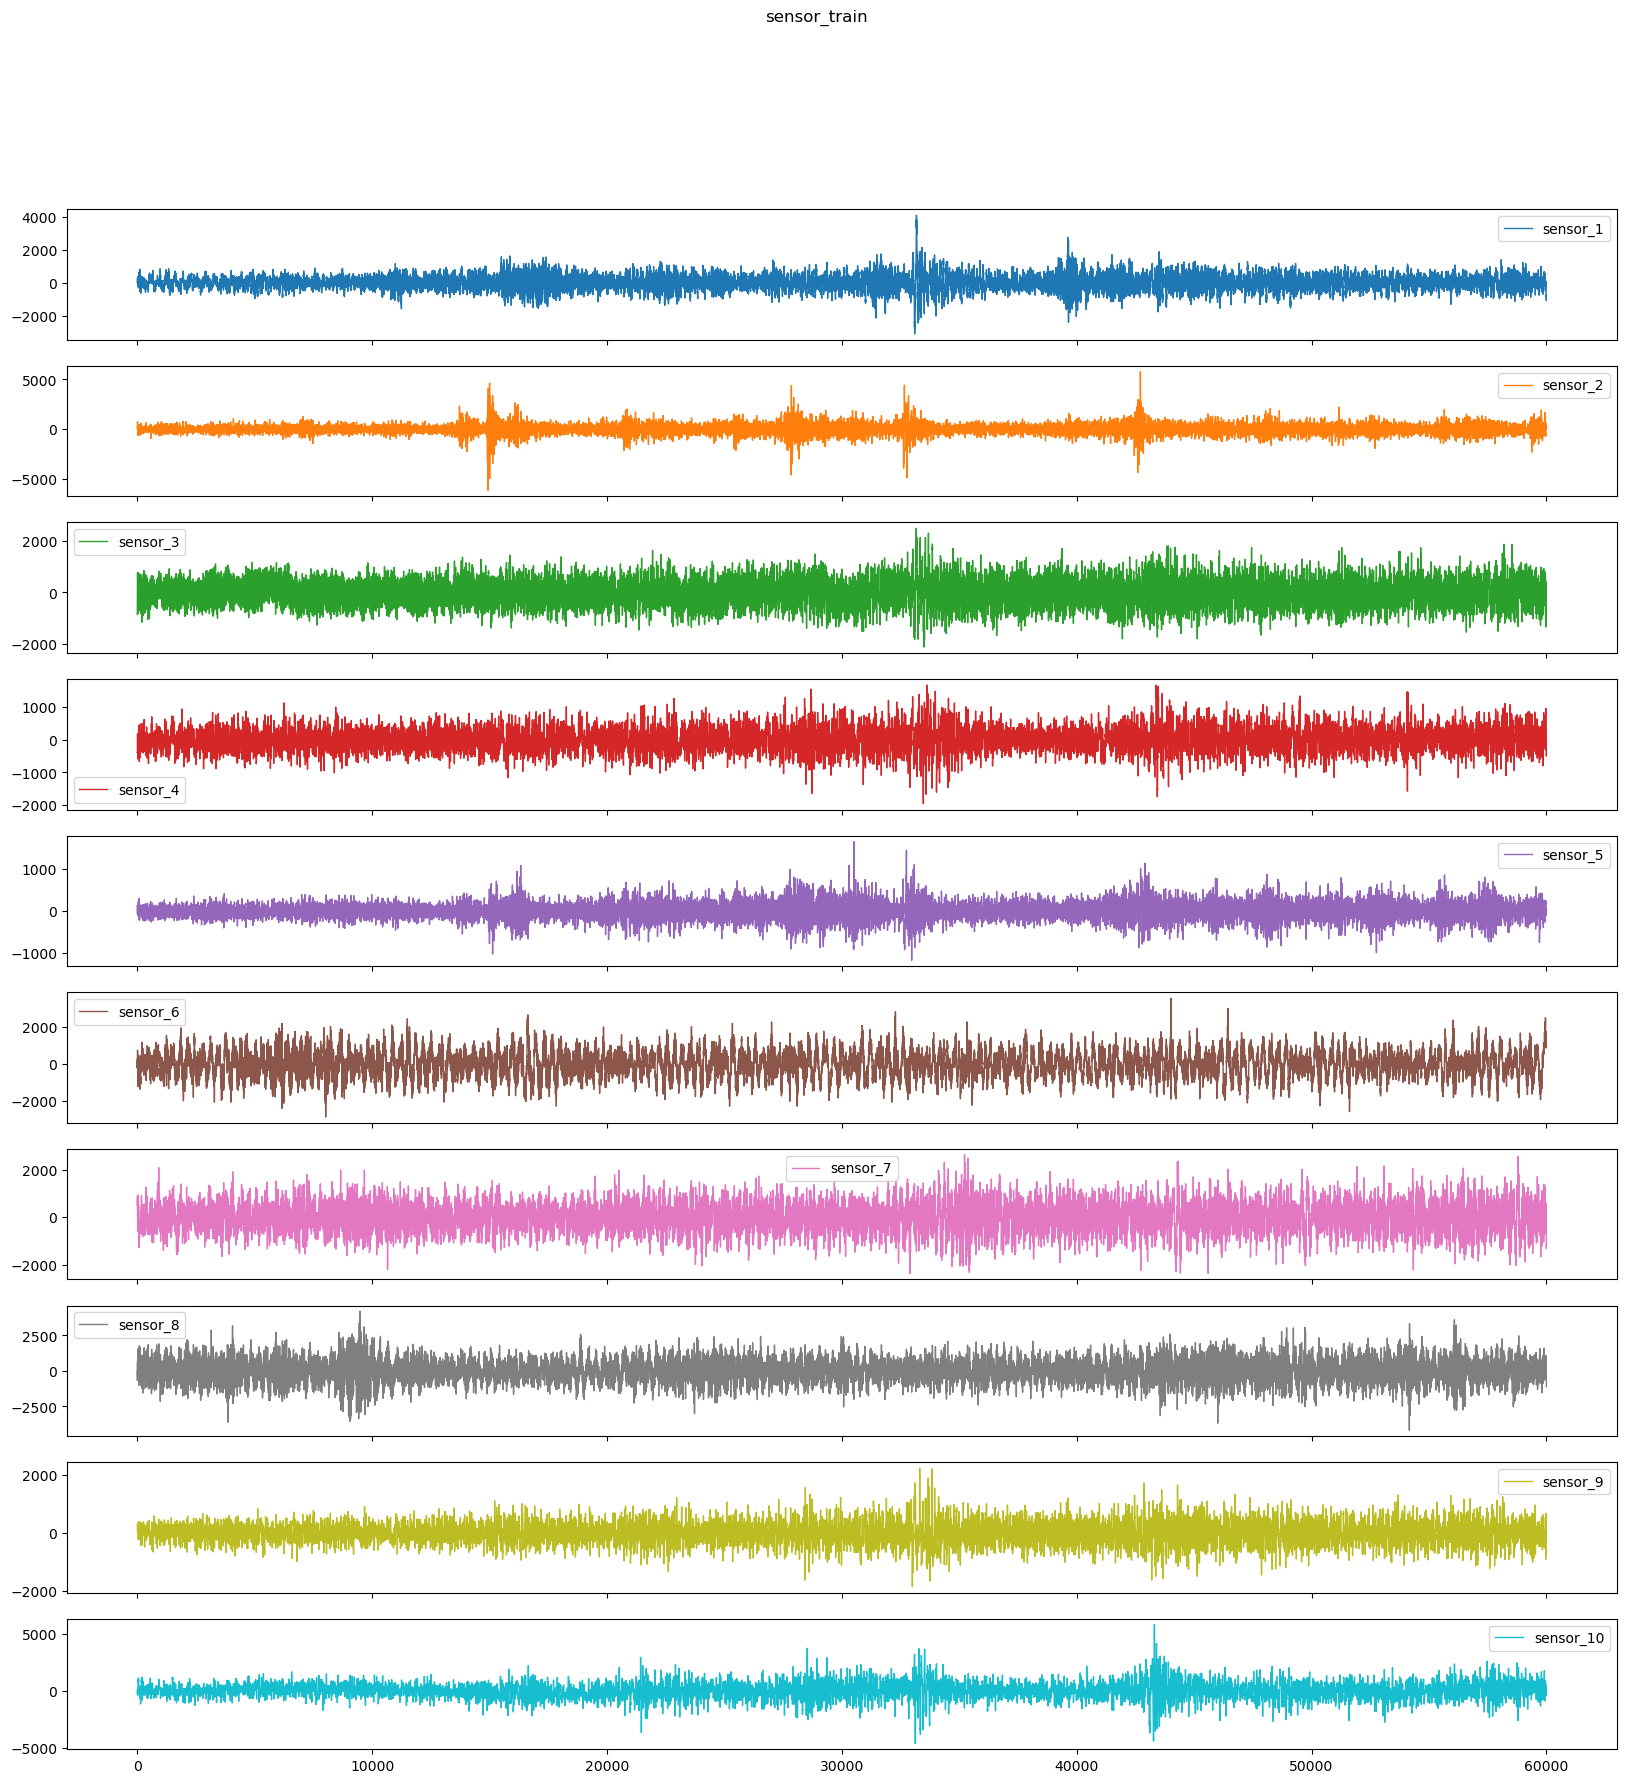

In [11]:
sensor_train.plot(figsize = (20,20),
                 subplots = True , 
                 layout = (10,1),
                  rot = 0,
                  lw = 1,
                  #colormap = 'jet',
                  title = 'sensor_train');

In [12]:
sensor_test = pd.read_csv('INGV/sensor test.csv')
sensor_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,66.0,375.0,0.0,-62.0,NaN,870.0,-345.0,665.0,169.0,0.0
1,29.0,295.0,-7.0,-37.0,NaN,923.0,-422.0,622.0,194.0,0.0
2,-114.0,147.0,-45.0,0.0,NaN,859.0,-447.0,674.0,199.0,0.0
3,234.0,-42.0,-68.0,0.0,NaN,722.0,-395.0,535.0,222.0,0.0
4,167.0,-200.0,-44.0,47.0,NaN,705.0,-355.0,655.0,220.0,0.0


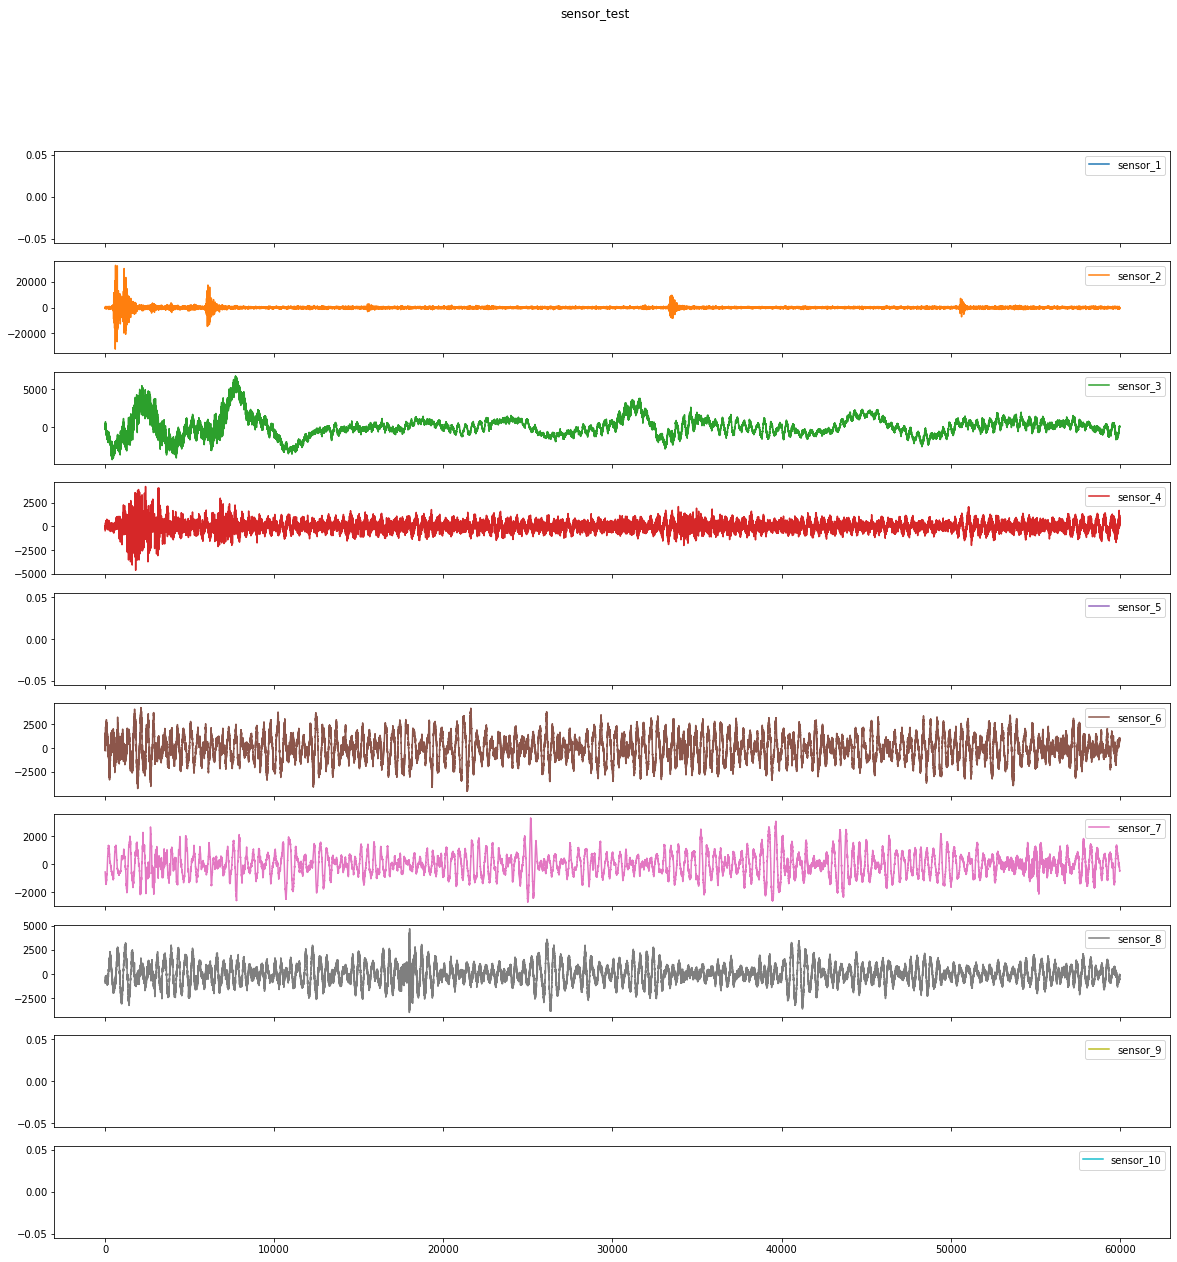

In [22]:
sensor_test.plot(figsize= (20,20),
                subplots = True,
                #layout = (10,1),
                #lw = 1 ,
                #rot = 0 ,
                title = 'sensor_test');

### Concat the sensor data into training and testing data

In [13]:
train_data = pd.concat([train,sensor_train],axis = 1)
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,224.0,32.0,-858.0,-390.0,109.0,38.0,507.0,630.0,100.0,-253.0
1,1.969648e+09,32739612.0,134.0,39.0,-682.0,-403.0,126.0,-136.0,589.0,267.0,134.0,-179.0
2,1.895880e+09,14965999.0,69.0,111.0,-520.0,-386.0,94.0,-20.0,649.0,-234.0,173.0,-93.0
3,2.068207e+09,26469720.0,47.0,185.0,-196.0,-341.0,44.0,-235.0,755.0,-434.0,184.0,-30.0
4,1.929556e+08,31072429.0,194.0,247.0,-84.0,-266.0,20.0,-76.0,876.0,-674.0,186.0,0.0


In [14]:
test_data = pd.concat([test,sensor_test],axis = 1)
test_data.head()

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,66.0,375.0,0.0,-62.0,NaN,870.0,-345.0,665.0,169.0,0.0
1,1.000234e+08,29.0,295.0,-7.0,-37.0,NaN,923.0,-422.0,622.0,194.0,0.0
2,1.000489e+09,-114.0,147.0,-45.0,0.0,NaN,859.0,-447.0,674.0,199.0,0.0
3,1.001029e+09,234.0,-42.0,-68.0,0.0,NaN,722.0,-395.0,535.0,222.0,0.0
4,1.001858e+09,167.0,-200.0,-44.0,47.0,NaN,705.0,-355.0,655.0,220.0,0.0


In [15]:
## find and remove missing values
train_data.isna().sum()

segment_id          55570
time_to_eruption    55570
sensor_1                0
sensor_2                0
sensor_3                0
sensor_4                0
sensor_5                0
sensor_6                0
sensor_7                0
sensor_8                0
sensor_9                0
sensor_10               0
dtype: int64

In [16]:
for label,content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_data[label] = content.fillna(content.median())

In [17]:
for label,content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            test_data[label] = content.fillna(content.median())

In [18]:
train_data.isna().sum()

segment_id          0
time_to_eruption    0
sensor_1            0
sensor_2            0
sensor_3            0
sensor_4            0
sensor_5            0
sensor_6            0
sensor_7            0
sensor_8            0
sensor_9            0
sensor_10           0
dtype: int64

In [19]:
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,224.0,32.0,-858.0,-390.0,109.0,38.0,507.0,630.0,100.0,-253.0
1,1.969648e+09,32739612.0,134.0,39.0,-682.0,-403.0,126.0,-136.0,589.0,267.0,134.0,-179.0
2,1.895880e+09,14965999.0,69.0,111.0,-520.0,-386.0,94.0,-20.0,649.0,-234.0,173.0,-93.0
3,2.068207e+09,26469720.0,47.0,185.0,-196.0,-341.0,44.0,-235.0,755.0,-434.0,184.0,-30.0
4,1.929556e+08,31072429.0,194.0,247.0,-84.0,-266.0,20.0,-76.0,876.0,-674.0,186.0,0.0


In [20]:
X = train_data.drop(['segment_id','time_to_eruption'],axis = 1)
y = train_data['time_to_eruption']

In [21]:
X.isna().sum()

sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
dtype: int64

In [22]:
y

0        12262005.0
1        32739612.0
2        14965999.0
3        26469720.0
4        31072429.0
            ...    
59996    22465586.0
59997    22465586.0
59998    22465586.0
59999    22465586.0
60000    22465586.0
Name: time_to_eruption, Length: 60001, dtype: float64

C:\Users\BHUVNESH\AppData\Local\Temp\ipykernel_8780\2537145385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['time_to_eruption'],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_to_eruption', ylabel='Density'>

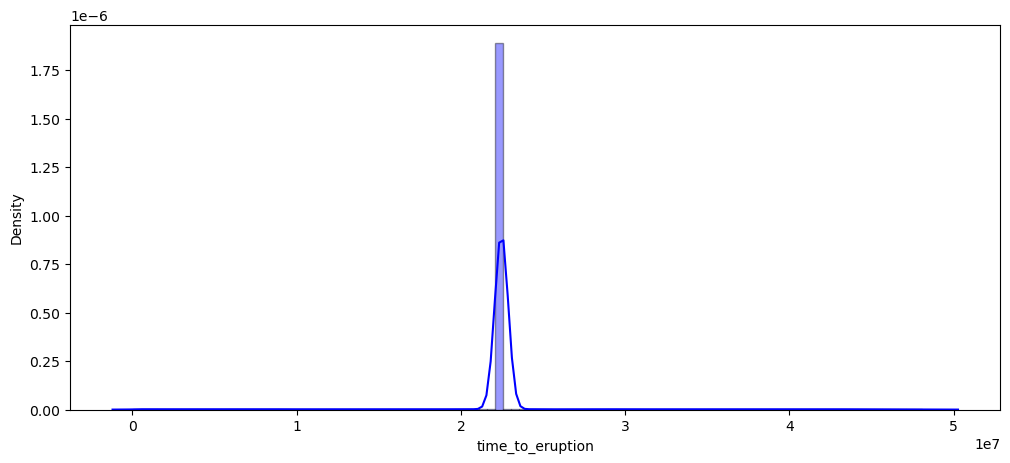

In [23]:
sns.distplot(train_data['time_to_eruption'],
            hist = True,
            kde = True,
            bins = 100,
            color = 'blue',
            hist_kws = {'edgecolor':'black'})

C:\Users\BHUVNESH\AppData\Local\Temp\ipykernel_8780\1425945563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['time_to_eruption'],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_to_eruption', ylabel='Density'>

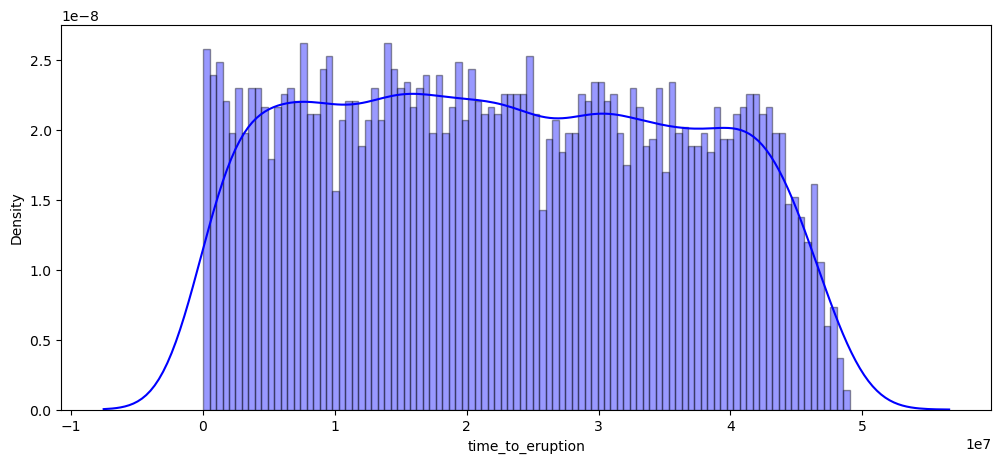

In [24]:
sns.distplot(train['time_to_eruption'],
            hist = True,
            kde = True,
            bins = 100,
            color = 'blue',
            hist_kws = {'edgecolor':'black'})

### Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((48000, 10), (12001, 10), (48000,), (12001,))

### Use Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
param = {'n_estimators':100,'max_depth': 20 , 'random_state':42}
regr = RandomForestRegressor().set_params(**param)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [27]:
y_pred = regr.predict(X_test)
y_pred

array([22544710.51029815, 22827552.63758178, 24644079.04259683, ...,
       21918955.65083868, 22486035.60604336, 22805381.37285396])

### Find important features

Text(0.5, 1.0, 'Most important features')

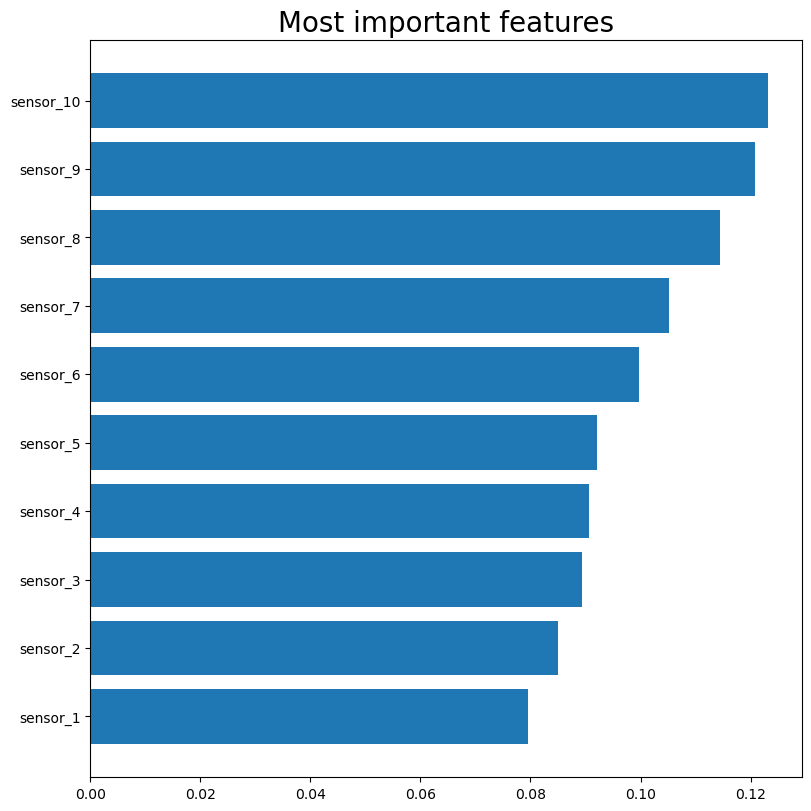

In [28]:
fig,ax = plt.subplots(figsize = (8,8),constrained_layout = True)
ax.barh(X_train.columns , regr.feature_importances_[regr.feature_importances_.argsort()])

ax.set_title('Most important features',fontsize = 20)


In [29]:
from sklearn.metrics import mean_absolute_error , r2_score

In [30]:
#display = PredictionErrorDisplay(y_test, y_pred)
#display.plot()

print(f"R2 score: \n", r2_score(y_test,y_pred))
print(f"MAE: \n", mean_absolute_error(y_test,y_pred))


R2 score: 
 -0.010595750390007153
MAE: 
 1148745.0159178765


In [106]:
regr.score(X_test,y_test)

-0.014298445584032482

### Use LGB Regressor and XGBoost Regressor in the Model

In [32]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.3 MB 7.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.3 MB/s eta 0:00:00


In [34]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.7/99.8 MB 7.6 MB/s eta 0:00:13
    --------------------------------------- 1.6/99.8 MB 10.0 MB/s eta 0:00:10
    --------------------------------------- 2.3/99.8 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 2.9/99.8 MB 13.1 MB/s eta 0:00:08
   - -------------------------------------- 3.6/99.8 MB 13.6 MB/s eta 0:00:08
   - -------------------------------------- 4.3/99.8 MB 13.7 MB/s eta 0:00:07
   - -------------------------------------- 5.0/99.8 MB 14.4 MB/s eta 0:00:07
   -- ------------------------------------- 5.7/99.8 MB 14.5 MB/s eta 0:00:07
   -- ------------------------------------- 6.3/99.8 MB 14.9 MB/s eta 0:00:07
   -- ------------------------------------- 7.0/99.8 MB 14.9 MB/s eta 0:00:07
   -

In [35]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [36]:
params = {
    'boosting_type': 'gbdt', 
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.1,
    'n_estimators': 100, 
    'subsample_for_bin': 200, # 200000 is default 
    #'objective': 'binary'
    'min_split_gain': 0.5,    # 0.0 is default 
    'min_child_weight': 1e-3, 
    'min_child_samples': 20,
    'subsample': 1,
    'colsample_bytree': 1.0,
    'min_data_in_leaf': 20,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'random_state': 42
    #'device': 'cpu', # you can use GPU to achieve faster learning
}

model_lgbm_regr = LGBMRegressor(boosting_type = params['boosting_type'], 
                                num_leaves = params['num_leaves'],
                                max_depth = params['max_depth'],
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                subsample_for_bin = params['subsample_for_bin'],
                                #objective = params['objective'],
                                min_split_gain = params['min_split_gain'], 
                                min_child_weight = params['min_child_weight'], 
                                min_child_samples = params['min_child_samples'],
                                subsample = params['subsample'],
                                colsample_bytree = params['colsample_bytree'],
                                min_data_in_leaf = params['min_data_in_leaf'],
                                feature_fraction = params['feature_fraction'],
                                bagging_fraction = params['bagging_fraction'],
                                random_state = params['random_state'],
                                #n_jobs = 5, 
                                silent = True
                               )








model_lgbm_regr.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'subsample', 'subsample_for_bin', 'subsample_freq', 'min_data_in_leaf', 'feature_fraction', 'bagging_fraction', 'silent'])

In [37]:
model_lgbm_regr.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overh

LGBMRegressor(bagging_fraction=1.0, feature_fraction=1.0, min_data_in_leaf=20,
              min_split_gain=0.5, random_state=42, silent=True, subsample=1,
              subsample_for_bin=200)

### Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy might try dart, check both
    'num_leaves': [10,31,50],        # large num_leaves helps improve accuracy but might lead to over-fitting
    'max_depth': [10,-1],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample_for_bin': [200],
    'objective' : ['binary'],
    'min_split_gain': [0.5],    # 0.0 is default 
    'min_child_weight': [1e-3], 
    'min_child_samples': [20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_data_in_leaf': [10, 20],
    'feature_fraction': [0.8, 1.0],
    'bagging_fraction': [0.8, 1.0],
    'random_state' : [42],
    }
grid = GridSearchCV(model_lgbm_regr, 
                    gridParams, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)


Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0

GridSearchCV(cv=5,
             estimator=LGBMRegressor(bagging_fraction=1.0, feature_fraction=1.0,
                                     min_data_in_leaf=20, min_split_gain=0.5,
                                     random_state=42, silent=True, subsample=1,
                                     subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 1.0],
                         'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.8, 1.0],
                         'feature_fraction': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [10, -1],
                         'min_child_samples': [20], 'min_child_weight': [0.001],
                         'min_data_in_leaf': [10, 20], 'min_split_gain': [0.5],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [10, 31, 50], 'objective': ['binary'],
                         'random_state': [42], 'subsample': [0.8, 1.0],
                         'subsample_for_bin': [200]},
             verbose=1)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'bagging_fraction': 0.8, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_data_in_leaf': 10, 'min_split_gain': 0.5, 'n_estimators': 50, 'num_leaves': 10, 'objective': 'binary', 'random_state': 42, 'subsample': 0.8, 'subsample_for_bin': 200}
-37.984709343567886


## Best Model Selection

In [40]:
params['boosting_type'] = grid.best_params_['boosting_type']
params['num_leaves'] = grid.best_params_['num_leaves']
params['max_depth'] = grid.best_params_['max_depth']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']
params['objective'] = grid.best_params_['objective']
params['min_split_gain'] = grid.best_params_['min_split_gain']
params['min_child_weight'] = grid.best_params_['min_child_weight']
params['min_child_samples'] = grid.best_params_['min_child_samples']
params['subsample'] = grid.best_params_['subsample']
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['min_data_in_leaf'] = grid.best_params_['min_data_in_leaf']
params['feature_fraction'] = grid.best_params_['feature_fraction']
params['bagging_fraction'] = grid.best_params_['bagging_fraction']
params['random_state'] = grid.best_params_['random_state']

In [44]:
model_lgbm_regr.fit(X_train,y_train , 
                    eval_set = [(X_train,y_train),(X_test,y_test)],
                   eval_metric = "mae")
                   #verbose = 50,
                   #early_stopping_rounds = 50)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overh

LGBMRegressor(bagging_fraction=1.0, feature_fraction=1.0, min_data_in_leaf=20,
              min_split_gain=0.5, random_state=42, silent=True, subsample=1,
              subsample_for_bin=200)

In [46]:
dtrain = lgbm.Dataset(X_train , label = y_train)
dtest = lgbm.Dataset(X_test , label = y_test)

In [49]:
model_lgbm = lgbm.train(params ,
                       train_set = dtrain,
                       num_boost_round = 100,
                       valid_sets = [dtest,dtrain])
                       #early_stopping_rounds = 20,
                       #verbose_eval = 4)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 48000, number of negative: 0
[LightGBM] [Info] Auto-choosing col-wise mult

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [50]:
test_data.head()

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,66.0,375.0,0.0,-62.0,NaN,870.0,-345.0,665.0,169.0,0.0
1,1.000234e+08,29.0,295.0,-7.0,-37.0,NaN,923.0,-422.0,622.0,194.0,0.0
2,1.000489e+09,-114.0,147.0,-45.0,0.0,NaN,859.0,-447.0,674.0,199.0,0.0
3,1.001029e+09,234.0,-42.0,-68.0,0.0,NaN,722.0,-395.0,535.0,222.0,0.0
4,1.001858e+09,167.0,-200.0,-44.0,47.0,NaN,705.0,-355.0,655.0,220.0,0.0


In [51]:
predictions = model_lgbm_regr.predict(test_data.drop(columns = ['segment_id']))
predictions = model_lgbm.predict(test_data.drop(columns = ['segment_id']))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0


In [52]:
y_preds = model_lgbm_regr.predict(X_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1 will be ignored. Current value: bagging_fraction=1.0


In [53]:
y_preds

array([22479061.97458365, 22389152.05611831, 22441536.20536482, ...,
       23081156.63419018, 22383988.96450482, 22167598.78460141])

### Find the error

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_train, y_preds)
print("mae:", mae)
lin_mse = mean_squared_error(y_train,y_preds)
lin_rmse = np.sqrt(lin_mse)
print("lin_mse:" , lin_mse)

mae: 968025.7275800322
lin_mse: 11923428849307.953


In [56]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [74]:
submit = pd.DataFrame()
submit['segment_id'] = test_data["segment_id"]
submit['time_to_eruption'] = predictions


In [82]:
submit = submit[:len(submission)]
submit.shape

(4520, 2)

<Axes: >

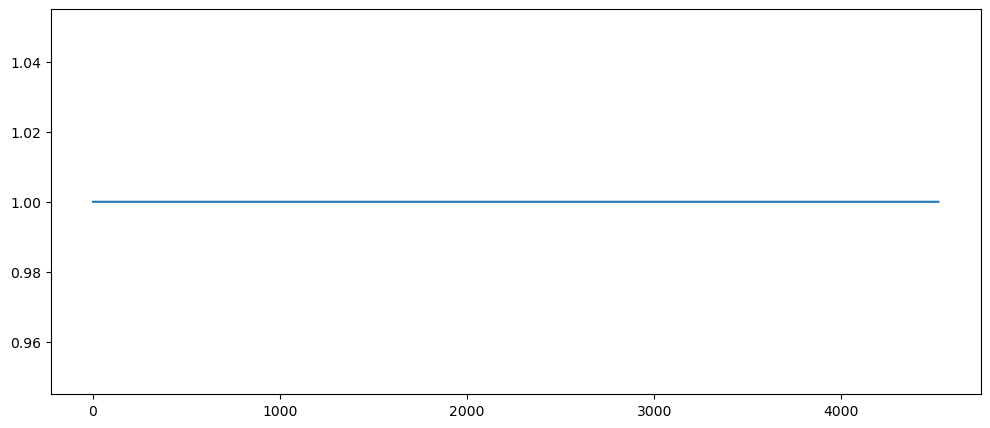

In [83]:
submit['time_to_eruption'].plot()

## XGBOOST

In [71]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_predxg = xgb_model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_predxg))
print(f"MAE: \n", mean_absolute_error(y_test,y_predxg))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

y_predxg

MAE: 
 1125573.2478960087
Root Mean Squared Error (RMSE): 3731130.26


array([22570780., 22601848., 23834864., ..., 22431070., 22418918.,
       22734696.], dtype=float32)